In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

### Viola-Jones Face Detection

Text(0.5, 1.0, 'Faces and Smiles Detected')

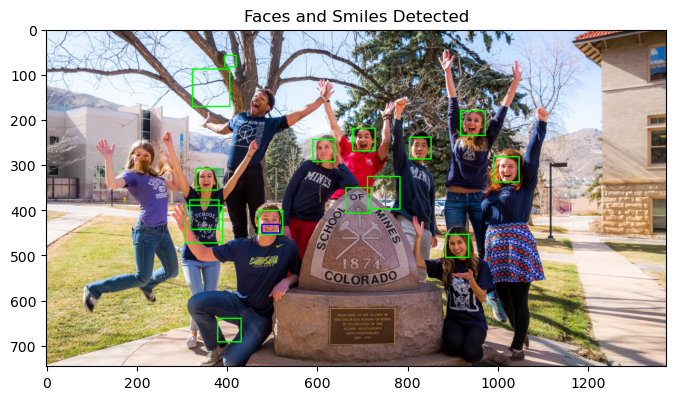

In [5]:
img = io.imread('data/csm1.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 

# trained data: https://github.com/opencv/opencv/tree/master/data/haarcascades
haar_face = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
haar_smile = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_smile.xml')

faces = haar_face.detectMultiScale(img_gray,
    scaleFactor=1.1,
    minNeighbors=3,
    flags=0,
    minSize=(0,0),
    maxSize=(0,0)) 

for (x, y, w, h) in faces: 
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2) 
    
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    smile = haar_smile.detectMultiScale(roi_gray, scaleFactor=1.05, minNeighbors=9)
    for (ex,ey,ew,eh) in smile:
        cv.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,0,255), thickness=2)

plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.title("Faces and Smiles Detected")